### Project Title

##### - Bank Marketing Effectiveness Prediction using ML

### Problem Statement

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. The classification goal is to predict if the client will subscribe a term deposit (variable y).

### Data Description

- age: age of client (numeric)
- job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
- marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
- default: has credit in default? (categorical: 'no','yes','unknown')
- housing: has housing loan? (categorical: 'no','yes','unknown')
- loan: has personal loan? (categorical: 'no','yes','unknown')
- contact: contact communication type (categorical: 'cellular','telephone')
- month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- balance: Account balance of client
- day: last contact day of the month
- duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
- y (target Variable) - has the client subscribed a term deposit? (binary: 'yes','no')

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV

from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,LabelEncoder
from scipy.stats import mode
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.impute import KNNImputer
from sklearn.feature_selection import RFE

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from IPython.display import display
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

## Data Gathering and Data Validation (DQ check)

In [2]:
df = pd.read_csv("bank-full.csv")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


#### Observations :

- Dataset having 45211 observations and 17 columns.
- In the dataset, there are object, float64, and int64 dtypes features present.
- Dataset having 0 duplicated values.
- There are no null/missing values in the dataset.

## Handling Outliers

In [4]:
# col = df.columns
# col

In [5]:
# Finding numerical variables
# numerical_var = df.select_dtypes(exclude="object")
# print(f'Numerical variables are : {list(numerical_var)}')

In [6]:
# Checking for outliers in numerical variables using boxplot
# from scipy.stats import norm

# # Plotting Box and Distribution plot using for loop
# for var in numerical_var:
#     plt.figure(figsize=(15,6))
#     plt.subplot(1,2,1)
#     ax=sns.boxplot(data=df[var])
#     ax.set_title(f'{var}')
#     ax.set_ylabel(var)

#     plt.subplot(1,2,2)
#     ax=sns.distplot(df[var], fit=norm)
#     ax.set_title(f'skewness of {var} : {df[var].skew()}')
#     ax.set_xlabel(var)
#     print()
#     plt.show()

- The variables age, balance, duration, campaign, pdays, and previous contain outliers. pdays, and previous have a flat interquartile range; it is best to remove those columns.
- Variable day does not have any outliers.

In [7]:
#use median for removing outliers of balance feature
# df['balance']=df['balance'].fillna(df['balance'].median())

In [8]:
# Using Inter Quartile Range for removing outliers from numerical variables
# Defining outlier features but remove flat IQR feature pdays and previous


# outlier_var=['age', 'duration', 'campaign']

# # Capping dataset
# for i in outlier_var:
#     # Findling IQR
#     Q1=df[i].quantile(0.25)
#     Q3=df[i].quantile(0.75)
#     IQR=Q3-Q1
    
#     # Defining upper and lower limit
#     lower_limit =df[i].quantile(0.25)-1.5*IQR
#     upper_limit =df[i].quantile(0.75)+1.5*IQR
    
#     # Applying lower and upper limit to each variables
#     df.loc[(df[i] > upper_limit),i] = upper_limit
#     df.loc[(df[i] < lower_limit),i] = lower_limit

In [9]:
# for var in outlier_var:
#     plt.figure(figsize=(15,6))
#     plt.subplot(1,2,1)
#     ax=sns.boxplot(data=df[var])
#     ax.set_title(f'{var}')
#     ax.set_ylabel(var)

#     plt.subplot(1,2,2)
#     ax=sns.distplot(df[var], fit=norm)
#     ax.set_title(f'skewness of {var} : {df[var].skew()}')
#     ax.set_xlabel(var)
#     print()
#     plt.show()

- Outliers are successfully removed from the dataset.

#### Observations:

- This dataset contains no values that are duplicates.
- Job, education, contacts, and poutcome each have unknown values of 288; 1857; 13020; and 36959. Since unknown values are not defined and can be removed from features by treatment, they can be handled as null.
Poutcome, contact, education, and job all have null values of 81.45%, 28.80%, 4.11%, and 0.64%, respectively.
- Replaced null values with their equivalent modes for features like contact, education, and employment. Additionally, features with more than 50% null values were eliminated because they were useless and negatively impacted model performance.
- Outliers are treated using the interquartile range for the variables age, balance, duration, campaign, p-days, and previous. It is better to eliminate the columns pdays and previous because they have an interquartile range which is flat.
- No outliers exist on a variable day.

## Handling missing value

In [10]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [11]:
df.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


In [12]:
df.describe(include='int')

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [13]:
for var in df.columns:
    print(df[var].value_counts())
    print('--'*45)

32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: age, Length: 77, dtype: int64
------------------------------------------------------------------------------------------
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
------------------------------------------------------------------------------------------
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
------------------------------------------------------------------------------------------
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
------------------------------------------------------------------------------------------
no 

#### Observations :

- job, marital, education, default, housing, loan, contact, month, poutcome, and y are among the 10 categorical variables     in this dataset.
- There are 7 numerical variables in this dataset: age, balance, day, duration, campaign, pdays, and previous.
- The unknown values for features job, education, contact, and poutcome are 288; 1857; 13020; and 36959, respectively.     Unknown values can be treated as null since they are not defined and can be taken out of features by treatment.

In [14]:
df = df.replace('unknown', np.nan)

In [15]:
df.isna().sum()

age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
y                0
dtype: int64

In [16]:
percentage_null_values = round(df.isna().sum()*100/len(df),2)
percentage_null_values

age           0.00
job           0.64
marital       0.00
education     4.11
default       0.00
balance       0.00
housing       0.00
loan          0.00
contact      28.80
day           0.00
month         0.00
duration      0.00
campaign      0.00
pdays         0.00
previous      0.00
poutcome     81.75
y             0.00
dtype: float64

In [17]:
null_variables=['poutcome','contact','education','job']

for var in null_variables:
    print(df[var].value_counts())
    print()

failure    4901
other      1840
success    1511
Name: poutcome, dtype: int64

cellular     29285
telephone     2906
Name: contact, dtype: int64

secondary    23202
tertiary     13301
primary       6851
Name: education, dtype: int64

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
Name: job, dtype: int64



In [18]:
# there are more than 50% null values in poutcome feature 
# thats why we need to drop this feature
df.drop(columns='poutcome', inplace=True)

In [19]:
df['contact']=df['contact'].fillna(df['contact'].mode()[0])
df['education']=df['education'].fillna(df['education'].mode()[0])  
df['job']=df['job'].fillna(df['job'].mode()[0])

### Replacing the categorical features

In [20]:
df['marital'] = df['marital'].replace({'single':0,'married':2,'divorced':1})
df['default'] = df['default'].replace({'yes':1,'no':0})
df['housing'] = df['housing'].replace({'yes':1,'no':0})
df['loan'] = df['loan'].replace({'yes':1,'no':0})
df['month'] = df['month'].replace({"jan":1,"feb":2,"mar":3,"apr":4,"may":5,"jun":6,"jul":7,"aug":8,"sep":9,"oct":10,"nov":11,"dec":12})
df['y'] = df['y'].replace({'yes':1,'no':0})
df['contact'] = df['contact'].replace({'cellular':1,'telephone':0})
df['education'] = df['education'].replace({'secondary':1,'tertiary':2, 'primary':0})
df['job'] = df['job'].replace({"blue-collar":0,"management":1,"technician":2,"admin.":3, "services":4,"retired":5,"self-employed":6,
                               "entrepreneur":7,"unemployed":8,"housemaid":9,"student":10 })

In [21]:
#one hot encoding for feature job
# df = pd.get_dummies(df,columns=["job"])

In [22]:
# knn_imputer = KNNImputer(n_neighbors=1)
# array = knn_imputer.fit_transform(df)
# df = pd.DataFrame(array,columns=df.columns)
# df

In [23]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
y            0
dtype: int64

- Replaced null values for features like contact, education, and job with their modes. In addition, removed features with more than 50% null values because they were worthless and hindered model performance.

## Univariate Analysis

- Uni means one and variate means variable, so in univariate analysis, 
  there is only one dependable variable. 
- The objective of univariate analysis is to derive the data, define and summarize it, and analyze the pattern present in    it. In a dataset, it explores each variable separately. 
- It is possible for two kinds of variables- Categorical and Numerical.

In [24]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,58,1,2,2,0,2143,1,0,1,5,5,261,1,-1,0,0
1,44,2,0,1,0,29,1,0,1,5,5,151,1,-1,0,0
2,33,7,2,1,0,2,1,1,1,5,5,76,1,-1,0,0
3,47,0,2,1,0,1506,1,0,1,5,5,92,1,-1,0,0
4,33,0,0,1,0,1,0,0,1,5,5,198,1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,2,2,2,0,825,0,0,1,17,11,977,3,-1,0,1
45207,71,5,1,0,0,1729,0,0,1,17,11,456,2,-1,0,1
45208,72,5,2,1,0,5715,0,0,1,17,11,1127,5,184,3,1
45209,57,0,2,1,0,668,0,0,0,17,11,508,4,-1,0,0


#### age and y

<AxesSubplot:xlabel='age', ylabel='count'>

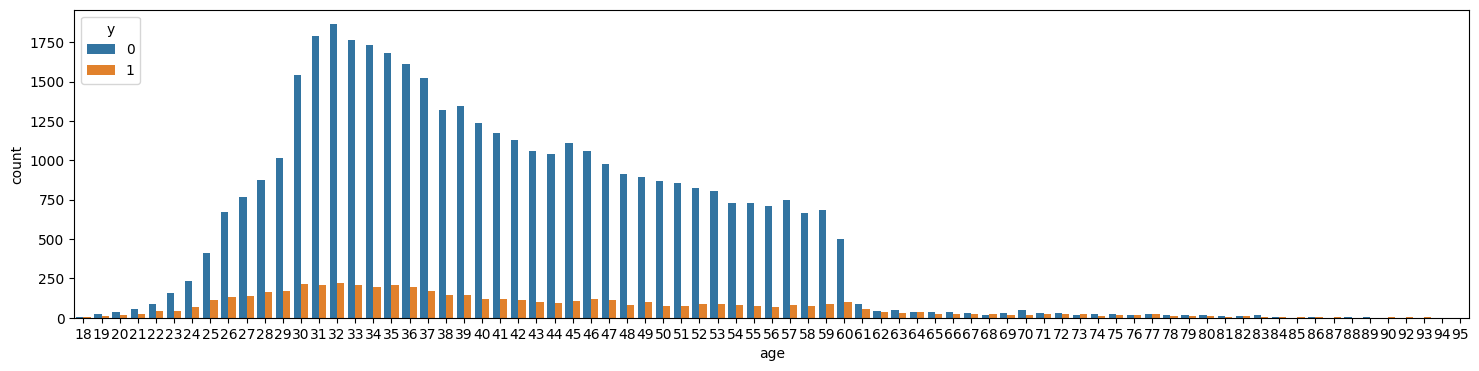

In [25]:
plt.figure(figsize=(18,4))
sns.countplot(x =df["age"],hue=df["y"])

- in this average population of age is between 25 to 60
- in this as compare to other age of 29 to 37 population have highest probability to invest in term deposit.

#### job and y

<AxesSubplot:xlabel='job', ylabel='count'>

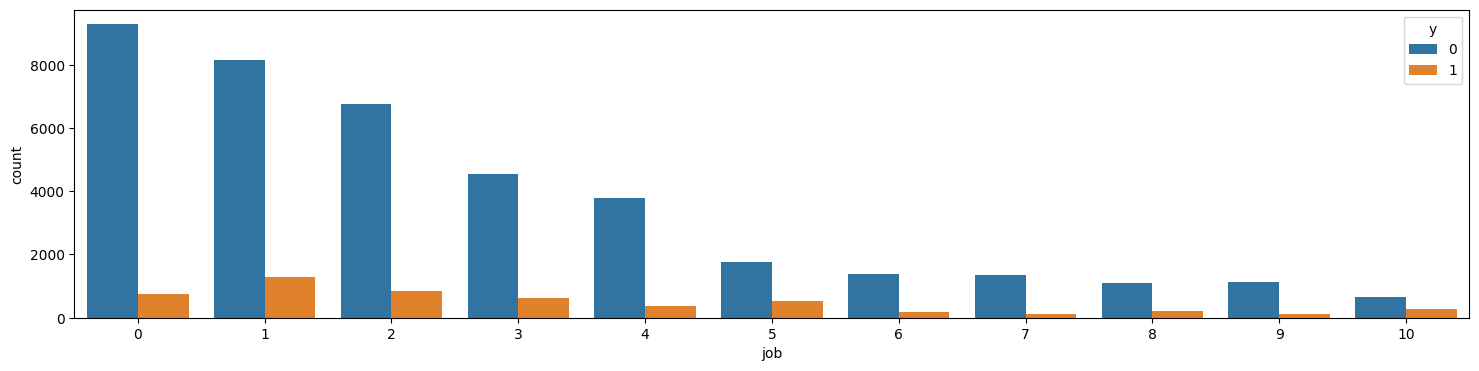

In [26]:
plt.figure(figsize=(18,4))
sns.countplot(x =df["job"],hue=df["y"])

#### job_technician and y

In [27]:
# plt.figure(figsize=(18,4))
# sns.countplot(x =df["job_technician"],hue=df["y"])

#### job_blue-collar and y

In [28]:
# plt.figure(figsize=(18,4))
# sns.countplot(x =df["job_blue-collar"],hue=df["y"])

- in this management, technician, and blue-collar are have a highest probability to invest in term deposit.

#### marital and y

<AxesSubplot:xlabel='marital', ylabel='count'>

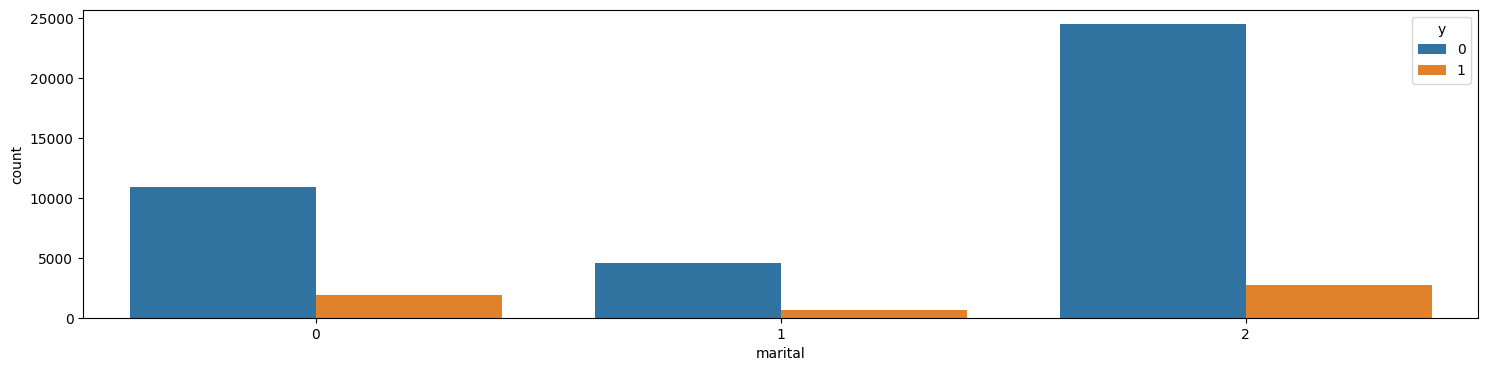

In [29]:
plt.figure(figsize=(18,4))
sns.countplot(x =df["marital"],hue=df["y"])

- Most of the clients are married. Clients who are married are the most likely to subscribe to term deposits, and divorced clients are less likely to subscribe to term deposits.

#### education and y

<AxesSubplot:xlabel='education', ylabel='count'>

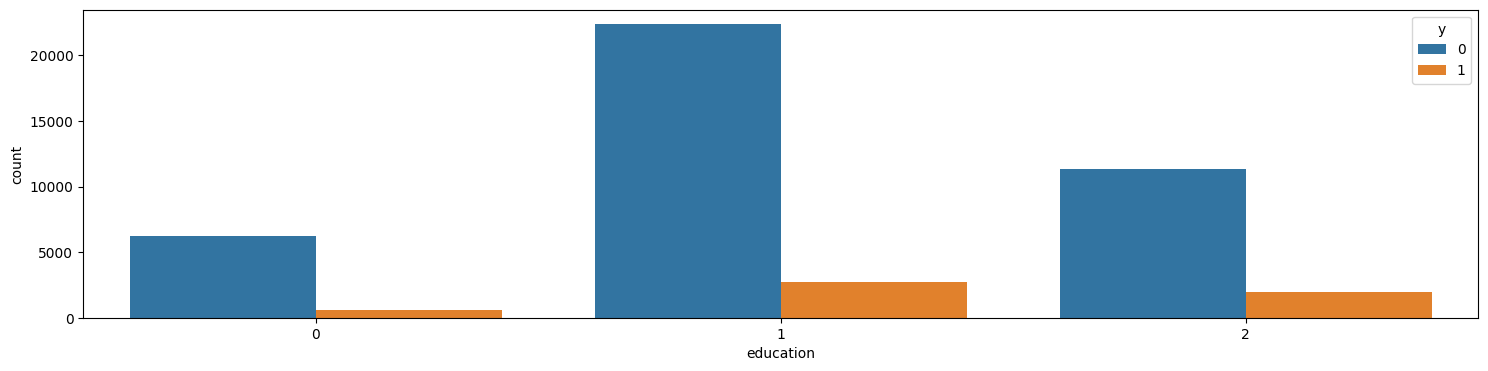

In [30]:
plt.figure(figsize=(18,4))
sns.countplot(x =df["education"],hue=df["y"])

- Clients who are more educated than the primary are more likely to sign up for a term deposit.

#### default and y

<AxesSubplot:xlabel='default', ylabel='count'>

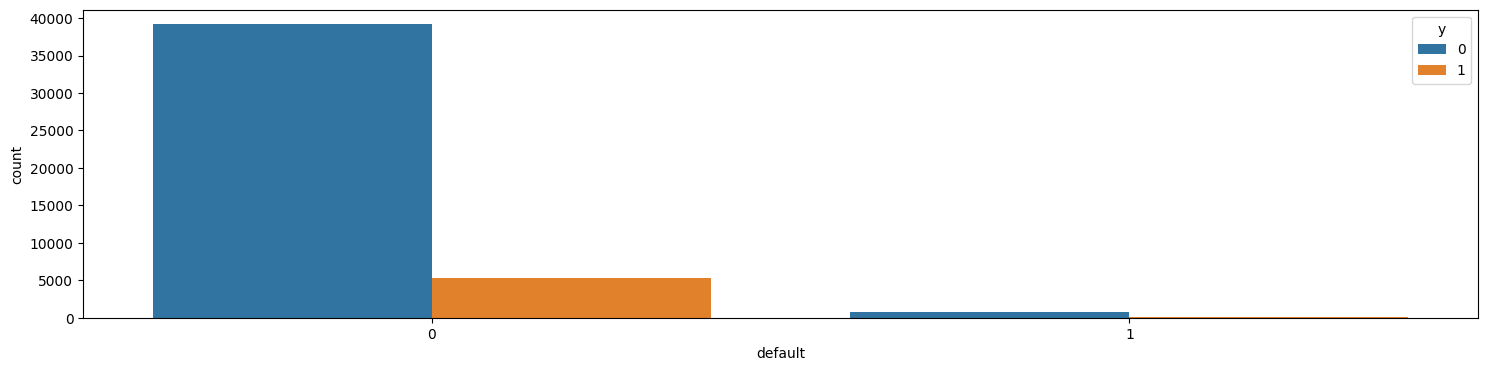

In [31]:
plt.figure(figsize=(18,4))
sns.countplot(x =df["default"],hue=df["y"])

- Most of the clients who subscribed to term deposits have no credit in default.

#### balance and y

<AxesSubplot:xlabel='balance', ylabel='count'>

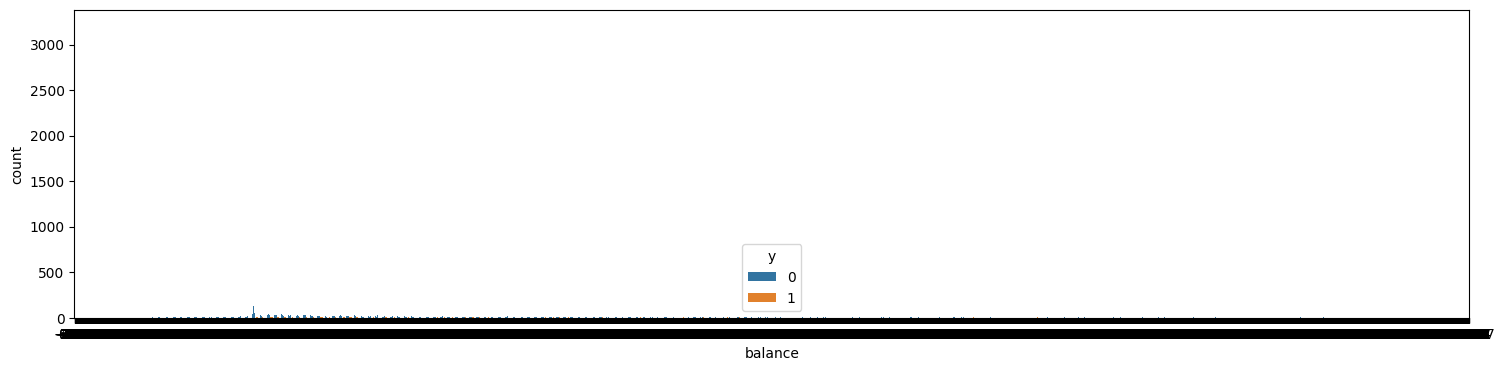

In [32]:
plt.figure(figsize=(18,4))
sns.countplot(x =df["balance"],hue=df["y"])

#### housing and y

<AxesSubplot:xlabel='housing', ylabel='count'>

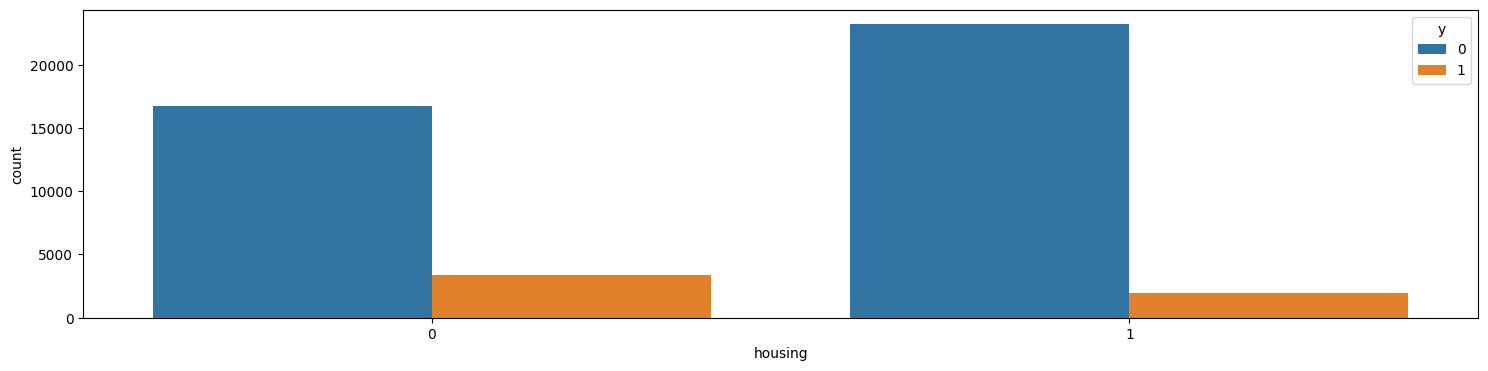

In [33]:
plt.figure(figsize=(18,4))
sns.countplot(x =df["housing"],hue=df["y"])

- The majority of clients who have signed up for a term deposit do not have any housing loan.
- If a client has a housing loan, there is a 51% chance that they will not subscribe to a term deposit.

#### loan and y

<AxesSubplot:xlabel='loan', ylabel='count'>

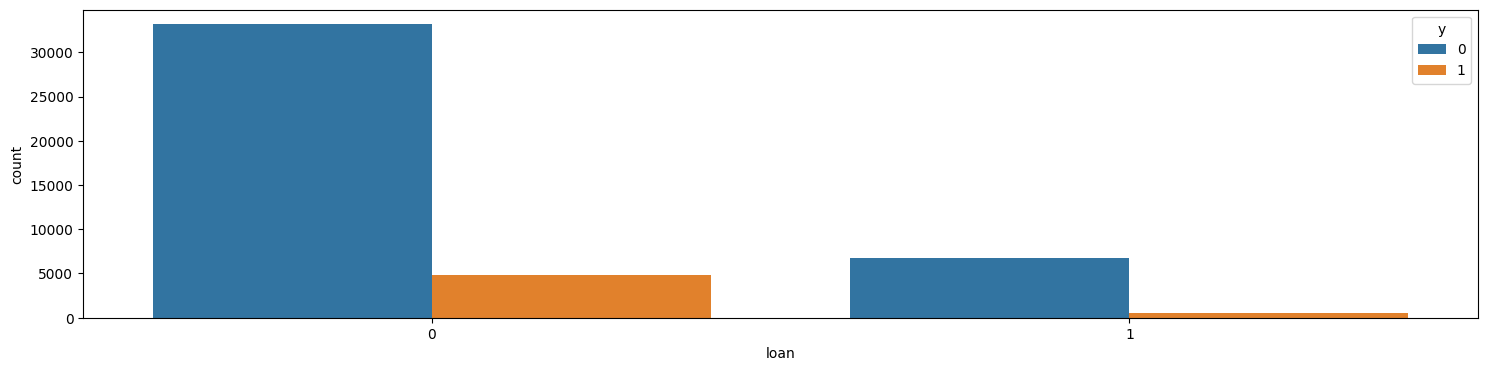

In [34]:
plt.figure(figsize=(18,4))
sns.countplot(x =df["loan"],hue=df["y"])

- Clients are more likely to subscribe to the term deposit if they do not have any personal loans.
- If the client has a personal loan, there is a greater chance that they will not subscribe to a term deposit.

#### contact and y

<AxesSubplot:xlabel='contact', ylabel='count'>

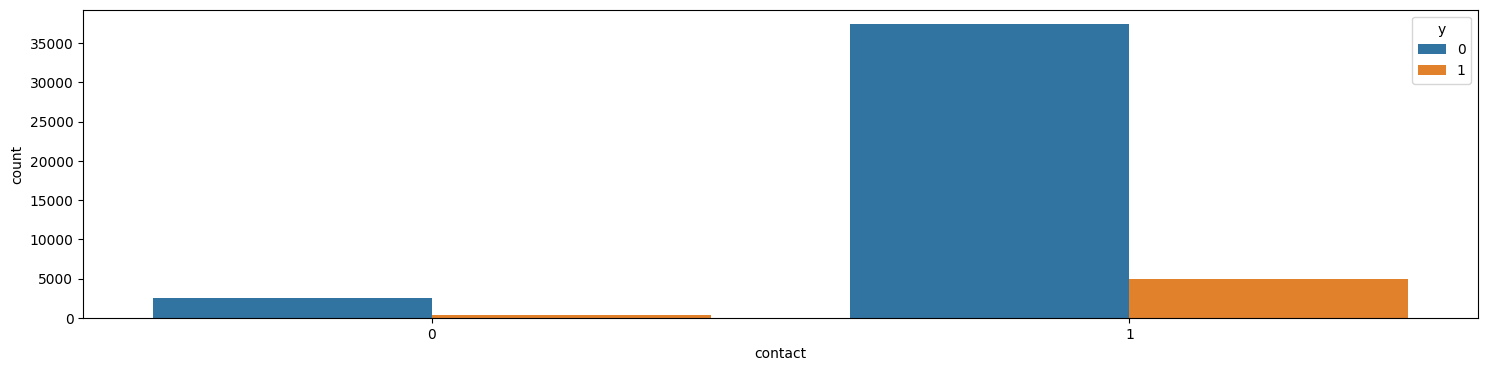

In [35]:
plt.figure(figsize=(18,4))
sns.countplot(x =df["contact"],hue=df["y"])

- The clients who were contacted with celluler are mostly subscribed to term deposits.

#### day and y

<AxesSubplot:xlabel='day', ylabel='count'>

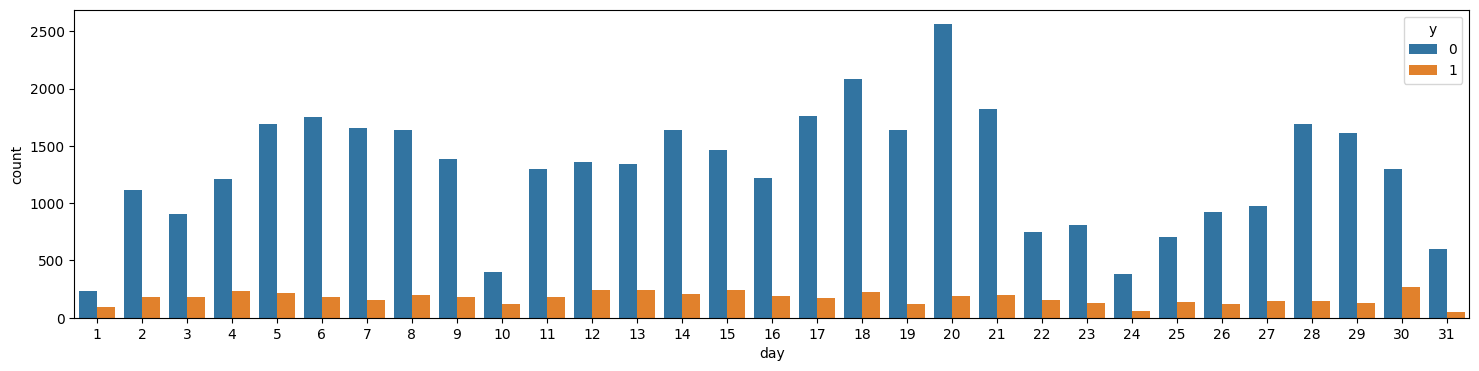

In [36]:
plt.figure(figsize=(18,4))
sns.countplot(x =df["day"],hue=df["y"])

- Less than one percent of total clients contacted per day subscribe to term deposits.

#### month and y

<AxesSubplot:xlabel='month', ylabel='count'>

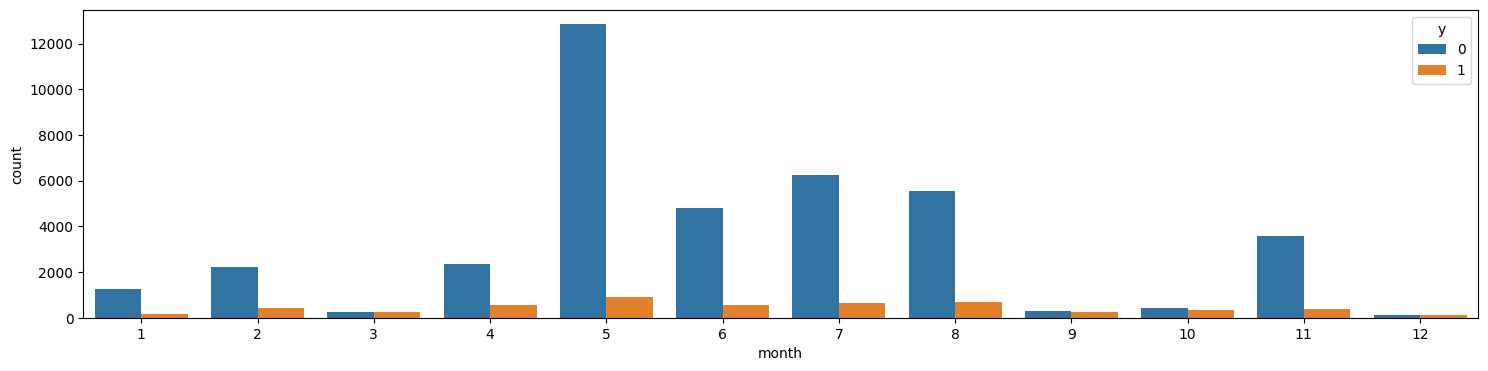

In [37]:
plt.figure(figsize=(18,4))
sns.countplot(x =df["month"],hue=df["y"])

- In May, June, July, August, and April, more than 1 percentage of clients subscribed to the term deposit, but other than this month, less than 1 percentage of clients subscribed to the term deposit.
- In June, July, August, and April, more than 1 percentage of clients subscribed to the term deposit, but other than this month, less than 1 percentage of clients subscribed to the term deposit. May's subscriber rate is more than double that of the other months of the year, a difference of more than 2 percentage.

#### duration and y

<AxesSubplot:xlabel='duration', ylabel='count'>

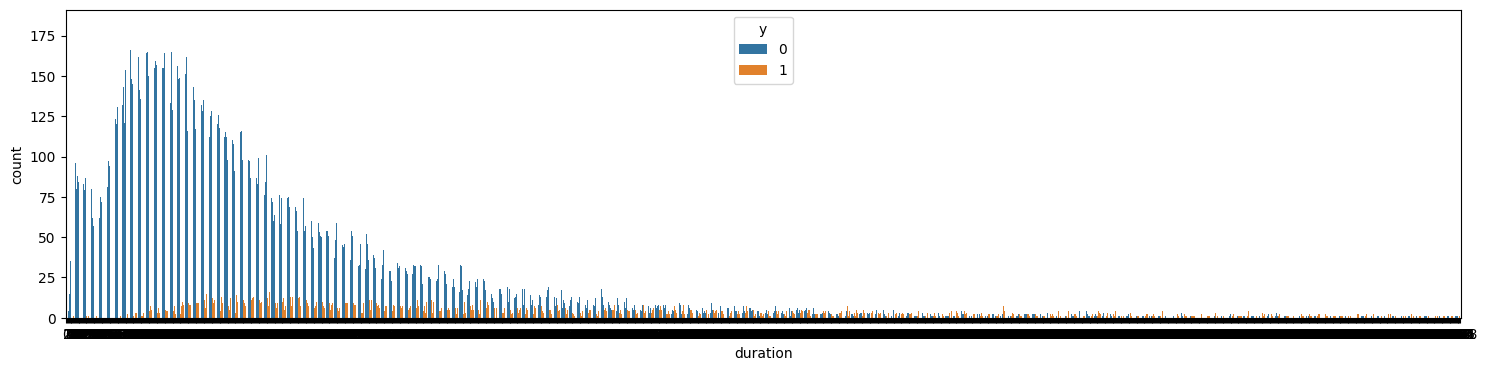

In [38]:
plt.figure(figsize=(18,4))
sns.countplot(x =df["duration"],hue=df["y"])

#### campaign and y

<AxesSubplot:xlabel='campaign', ylabel='count'>

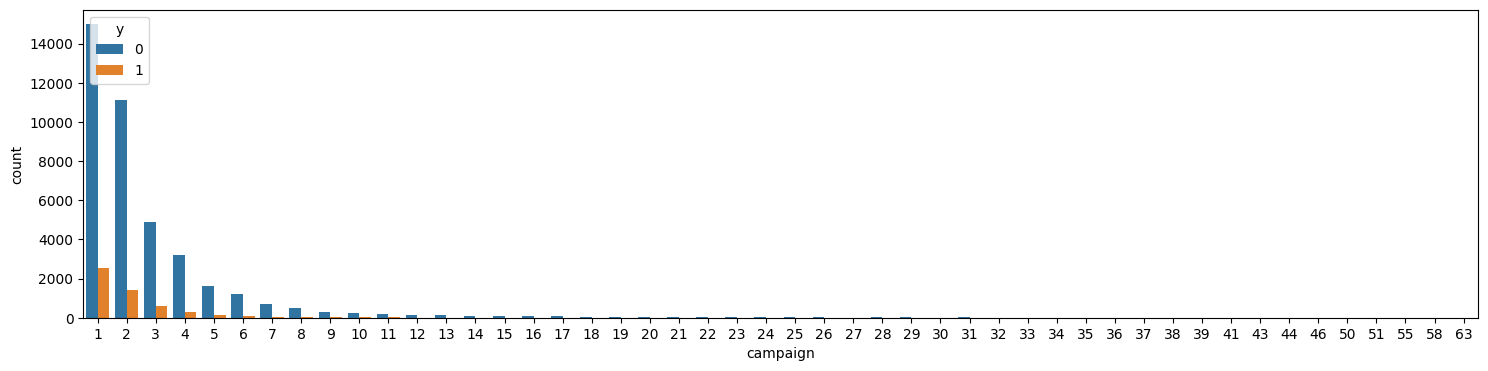

In [39]:
plt.figure(figsize=(18,4))
sns.countplot(x =df["campaign"],hue=df["y"])

- No one has signed up for term deposit if they have received more than three phone calls. Less than three times contacted clients who signed up for term deposits.
- Only 11.7% of total clients sign up for term deposits, which means that there is an 88.3% chance that clients will not subscribe to term deposits.

## Bivariate Analysis

- Bi means two and variate means variable, so here there are two variables. 
- he analysis is related to cause and the relationship between the two variables

<AxesSubplot:xlabel='job', ylabel='education'>

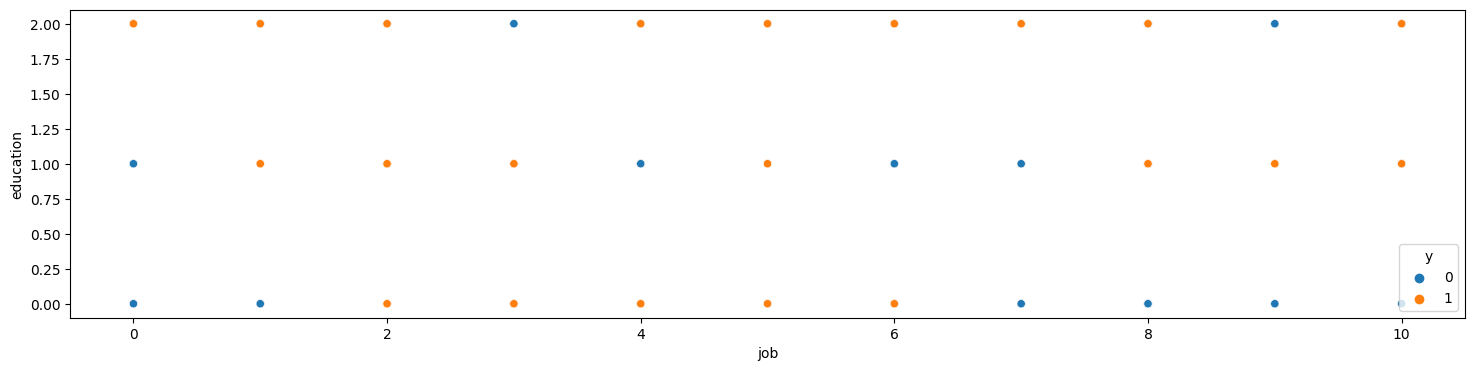

In [40]:
plt.figure(figsize=(18,4))
sns.scatterplot(x =df["job"],y = df["education"],hue=df["y"])

In [41]:
# plt.figure(figsize=(18,4))
# sns.scatterplot(x =df["job_technician"],y = df["education"],hue=df["y"])

In [42]:
# plt.figure(figsize=(18,4))
# sns.scatterplot(x =df["job_blue-collar"],y = df["education"],hue=df["y"])

#### Observations :

- Most clients who have management-related jobs and a tertiary degree have subscribed to the term deposits.
- Customers with a secondary education are the second most likely to subscribe to term deposits.

<AxesSubplot:xlabel='contact', ylabel='duration'>

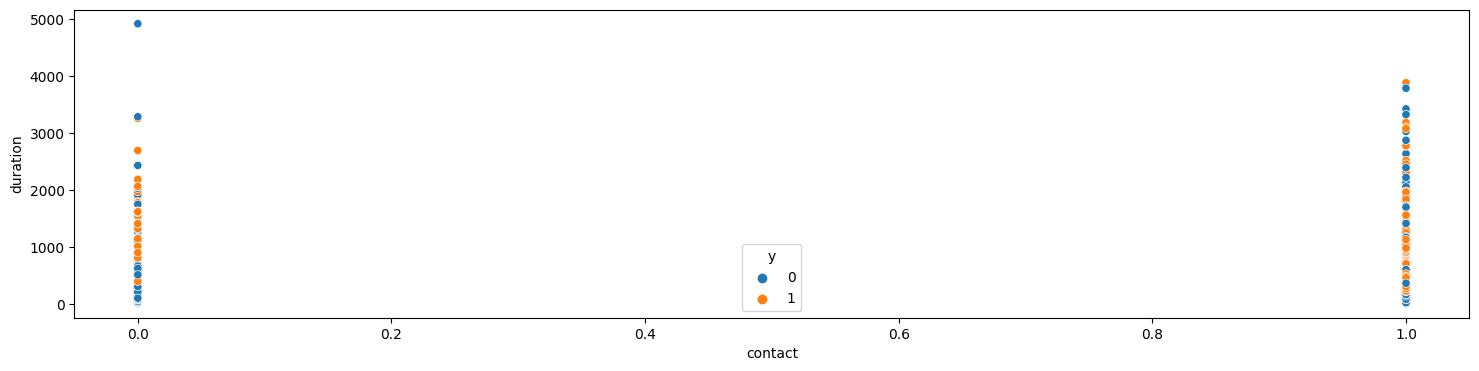

In [43]:
plt.figure(figsize=(18,4))
sns.scatterplot(x =df["contact"],y = df["duration"],hue=df["y"])

#### Observations :

- Clients are more likely to subscribe to term deposits if they spend more time on the phone.
- Average of 400 seconds required to convey clients' intent to subscribe and make a term deposit

## Multivariate Analysis

- Multivariate analysis is required when more than two variables have to be analyzed simultaneously. 
- It is a tremendously hard task for the human brain to visualize a relationship among 4 variables in a graph 
  and thus multivariate analysis is used to study more complex sets of data.

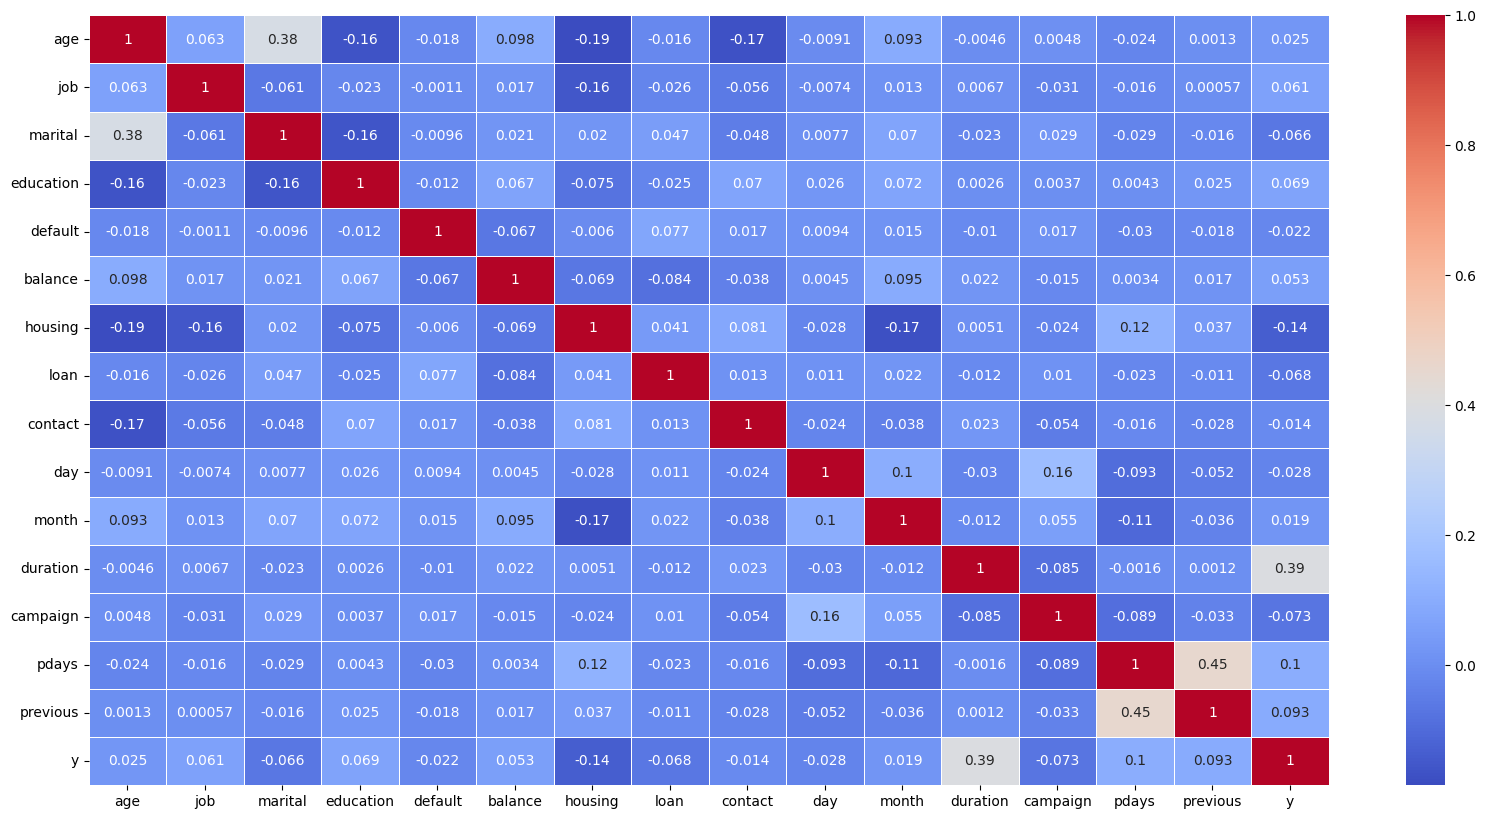

In [44]:
f, ax = plt.subplots(figsize = (20, 10))
sns.heatmap(df.corr(),ax = ax, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

#### Observations :

- There is no correlation between any independent variables.

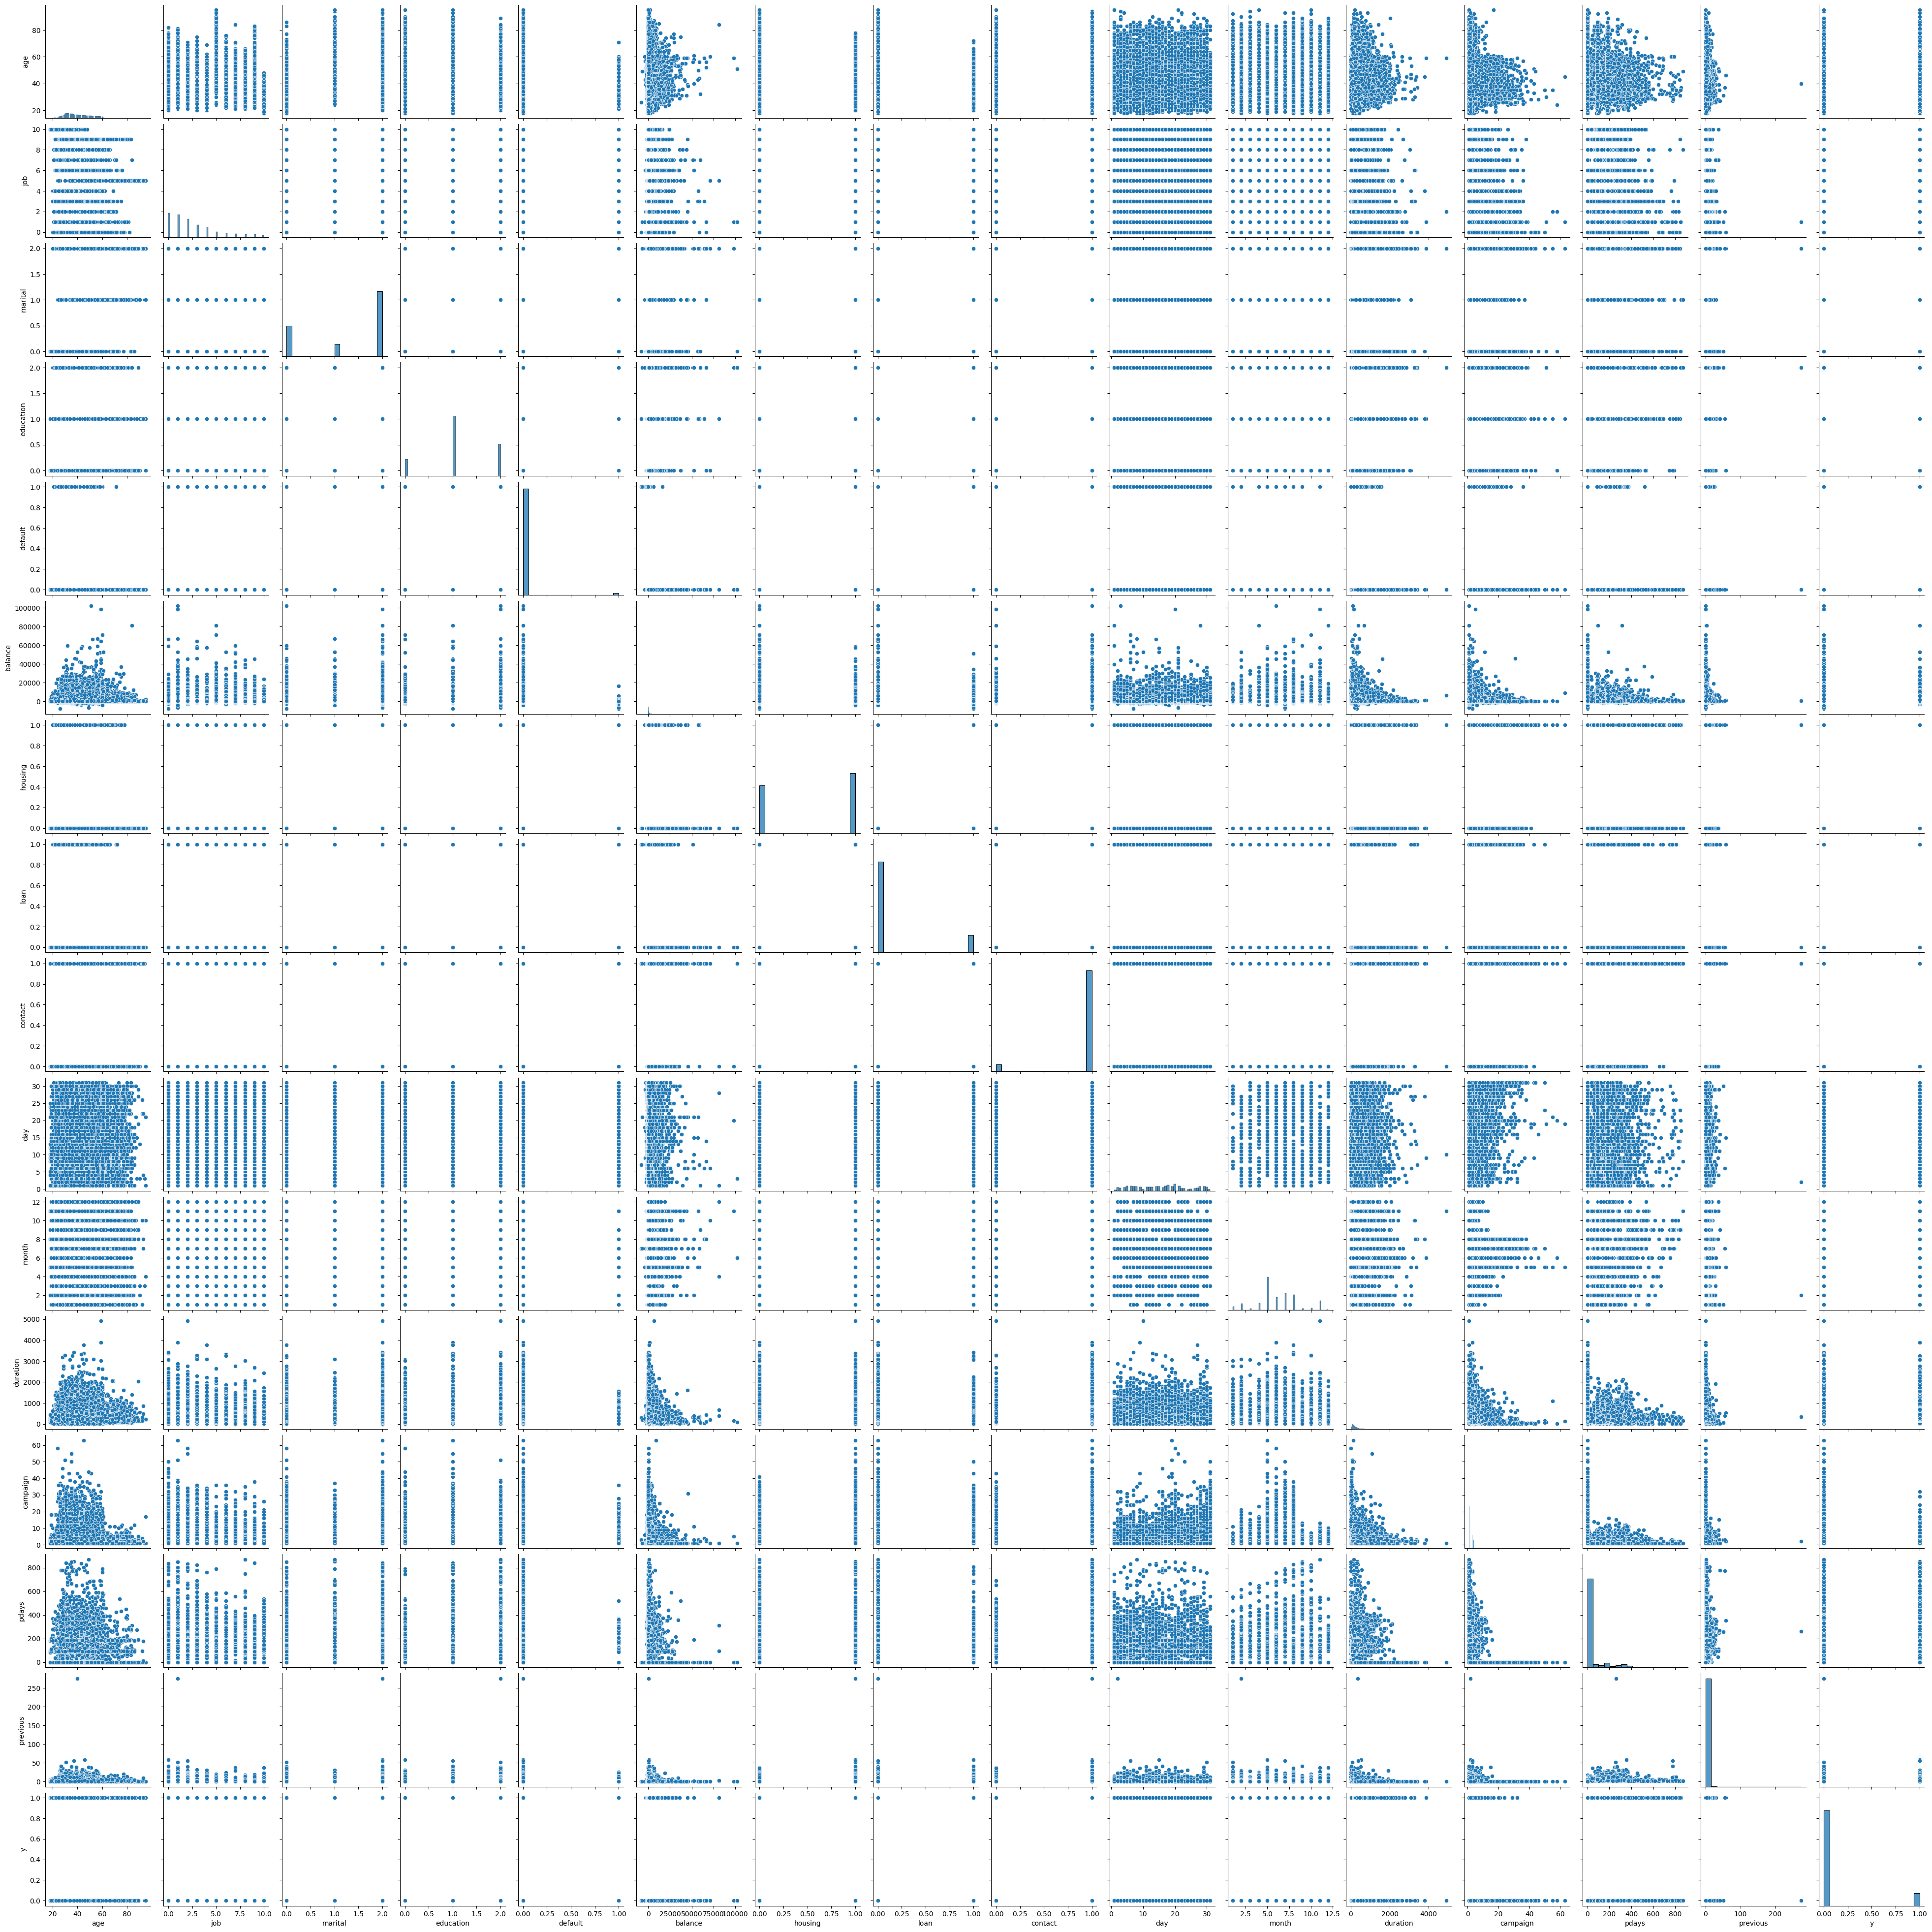

In [45]:
sns.pairplot(df, palette="husl")
plt.show()

- all features are indendependent to each other.

### Separating Dependant and Independant variables

### Data Splitting

In [46]:
x = df.drop("y",axis=1)
y = df["y"]

In [47]:
# Splitting dataset into training set and test set
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=42)

In [48]:
y_test.value_counts()

0    7952
1    1091
Name: y, dtype: int64

In [49]:
# Checking shape of split
print(f'Shape of X_train : {X_train.shape}')
print(f'Shape of X_test : {X_test.shape}')
print(f'Shape of y_train : {y_train.shape}')
print(f'Shape of y_test : {y_test.shape}')

Shape of X_train : (36168, 15)
Shape of X_test : (9043, 15)
Shape of y_train : (36168,)
Shape of y_test : (9043,)


- We divided the dataset into 20% for model testing and 80% for training.

### ML Model Implementation

In [50]:
# Defining function which fit classification algoritham, evaluate and visualise model using train test split

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, roc_curve, auc
from tabulate import tabulate

def evaluation(X_train,X_test,y_train,y_test,obj):

    y_train_pred = obj.predict(X_train)
    y_test_pred = obj.predict(X_test)
    
    ## Evaluate the model
    cm_train = confusion_matrix(y_train, y_train_pred)
    
    accuracy_train = accuracy_score(y_train, y_train_pred)
    
    precision_train = precision_score(y_train, y_train_pred)
    
    recall_train = recall_score(y_train, y_train_pred)
    
    f1_train = f1_score(y_train, y_train_pred)
    
    roc_auc_score_train=roc_auc_score(y_train, y_train_pred)
    
    classification_rep_train = classification_report(y_train,y_train_pred)
    

    
    
    cm_test = confusion_matrix(y_test, y_test_pred)
    
    accuracy_test = accuracy_score(y_test, y_test_pred)
    
    precision_test = precision_score(y_test, y_test_pred)
    
    recall_test = recall_score(y_test, y_test_pred)
    
    f1_test = f1_score(y_test, y_test_pred)
    
    roc_auc_score_test=roc_auc_score(y_test, y_test_pred)
    
    classification_rep_test = classification_report(y_test,y_test_pred)
    
    
    print("Confusion Matrix train: \n", cm_train)
    print("Confusion Matrix test: \n", cm_test)
    print('\n')
    print("classification report train: \n",classification_rep_train)
    print("classification report test: \n",classification_rep_test)
    print('\n')
    
    metrics = ["Accuracy","Precision","Recall","F1-score","Roc-Auc-score"]
    training_eval = [accuracy_train,precision_train,recall_train,f1_train,roc_auc_score_train]
    testing_eval = [accuracy_test,precision_test,recall_test,f1_test,roc_auc_score_test]
    
    df_eval = pd.DataFrame({"Evaluation Matrics":metrics,
                            "Training":training_eval,
                            "Testing":testing_eval})
    print(tabulate(df_eval,headers="keys",tablefmt="grid"))

### Logistic Regression

In [51]:
# Import Logistic Regression algoritham in envirnoment
# from sklearn.linear_model import LogisticRegression

# logistic_obj = LogisticRegression()
# logistic_obj.fit(X_train,y_train)

In [52]:
# evaluation(X_train,X_test,y_train,y_test,logistic_obj)

### Decision Tree

In [53]:
# from sklearn.tree import DecisionTreeClassifier
# dt_clf = DecisionTreeClassifier()
# dt_clf.fit(X_train,y_train)

In [54]:
# evaluation(X_train,X_test,y_train,y_test,dt_clf)

### Hyperparameter Tuning

In [55]:
## Import Decision Tree algoritham in envirnoment
# from sklearn.tree import DecisionTreeClassifier

# dt_clf = DecisionTreeClassifier()
# parameters = {'criterion':["gini","entropy"],
#               'max_depth':np.arange(3,10),
#               'min_samples_split':np.arange(2,10),
#               'min_samples_leaf':np.arange(2,15)}
# gscvdt_clf = GridSearchCV(dt_clf,parameters,cv=5)
# gscvdt_clf.fit(X_train,y_train)

### After Hyperparameter Tunning

In [56]:
# gscvdt_clf.best_estimator_

In [57]:
# dt_obj = DecisionTreeClassifier(criterion='entropy',max_depth=8,min_samples_leaf=3,min_samples_split=6)
# dt_obj.fit(X_train,y_train)

### Random Forest

In [58]:
# Import Random Forest algoritham in envirnoment
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [59]:
evaluation(X_train,X_test,y_train,y_test,rf)

Confusion Matrix train: 
 [[31970     0]
 [    0  4198]]
Confusion Matrix test: 
 [[7703  249]
 [ 688  403]]


classification report train: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     31970
           1       1.00      1.00      1.00      4198

    accuracy                           1.00     36168
   macro avg       1.00      1.00      1.00     36168
weighted avg       1.00      1.00      1.00     36168

classification report test: 
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      7952
           1       0.62      0.37      0.46      1091

    accuracy                           0.90      9043
   macro avg       0.77      0.67      0.70      9043
weighted avg       0.88      0.90      0.88      9043



+----+----------------------+------------+-----------+
|    | Evaluation Matrics   |   Training |   Testing |
+====+======================+============+===========+
|  0 | 

#### Random forest Hyperparameter tunning

In [60]:
# rf = RandomForestClassifier()
# parameters = {"n_estimators":np.arange(3,20),
#               "criterion":['gini','entropy'],
#               "max_depth":np.arange(3,10),
#               "min_samples_split":np.arange(2,10),
#               "min_samples_leaf":np.arange(2,15),
#              }
# gscv_rf = GridSearchCV(rf,parameters,cv=5)
# gscv_rf.fit(X_train,y_train)

### K-Nearest Neighbor(KNN)

In [61]:
# Import KNN algoritham in envirnoment
# from sklearn.neighbors import KNeighborsClassifier
# knn_clf = KNeighborsClassifier()
# knn_clf.fit(X_train,y_train)

In [62]:
# evaluation(knn_clf)

### Hyperparamter Tuning

In [63]:
# knn_clf = KNeighborsClassifier()
# hyperparameter = {"n_neighbors":np.arange(3,40),
#                  "p":[1,2]}
# gscv_knn_clf = GridSearchCV(knn_clf,hyperparameter,cv = 5)
# gscv_knn_clf.fit(X_train,y_train)

### After Hyperparameter Tunning

In [64]:
# gscv_knn_clf.best_estimator_

In [65]:
# knn_clf = KNeighborsClassifier(n_neighbors=26, p=1) 
# knn_clf.fit(X_train,y_train)

#### Recursive feature elimination

In [66]:
x1 = df.drop("y", axis=1)
y1 = df["y"]

In [67]:
df.shape

(45211, 16)

In [68]:
x_train_rfe,x_test_rfe,y_train_rfe,y_test_rfe = train_test_split(x1,y1,test_size=0.2,random_state=0)

In [69]:
from imblearn.over_sampling import SMOTE

In [70]:
smt = SMOTE()
x_train_rfe,y_train_rfe = smt.fit_resample(x_train_rfe,y_train_rfe)

In [71]:
rfe = RFE(RandomForestClassifier(random_state=0),n_features_to_select=9)
rfe.fit(x_train_rfe,y_train_rfe)

RFE(estimator=RandomForestClassifier(random_state=0), n_features_to_select=9)

In [72]:
evaluation(x_train_rfe,x_test_rfe,y_train_rfe,y_test_rfe,rfe)

Confusion Matrix train: 
 [[31941     1]
 [    1 31941]]
Confusion Matrix test: 
 [[7182  798]
 [ 367  696]]


classification report train: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     31942
           1       1.00      1.00      1.00     31942

    accuracy                           1.00     63884
   macro avg       1.00      1.00      1.00     63884
weighted avg       1.00      1.00      1.00     63884

classification report test: 
               precision    recall  f1-score   support

           0       0.95      0.90      0.92      7980
           1       0.47      0.65      0.54      1063

    accuracy                           0.87      9043
   macro avg       0.71      0.78      0.73      9043
weighted avg       0.89      0.87      0.88      9043



+----+----------------------+------------+-----------+
|    | Evaluation Matrics   |   Training |   Testing |
+====+======================+============+===========+
|  0 | 

### creating json file

In [93]:
import json as js

In [94]:
marital_values = {'married':2,'single':0,'divorced':1}
education_values = {'secondary':1,'tertiary':2, 'primary':0}
contact_values = {'cellular':1,'telephone':0}
default_values = {'yes':1,'no':0}
housing_values = {'yes':1,'no':0}
loan_values = {'yes':1,'no':0}
y_values = {'yes':1,'no':0}
y_values_rev = {1:'yes',0:'no'}
job_values = {"blue-collar":0,"management":1,"technician":2,"admin.":3, "services":4,"retired":5,"self-employed":6,
                               "entrepreneur":7,"unemployed":8,"housemaid":9,"student":10 }
month_values = {"jan":1,"feb":2,"mar":3,"apr":4,"may":5,"jun":6,"jul":7,"aug":8,"sep":9,"oct":10,"nov":11,"dec":12}



encoded_col = {"marital_values":marital_values,
               "education_values":education_values,
              "contact_values":contact_values,
              "default_values":default_values,
              "housing_values":housing_values,
              "loan_values":loan_values,
              "y_values":y_values,
              "y_values_rev":y_values_rev,
              "job_values":job_values,
              "month_values":month_values,
              "columns":list(x1.columns)
              }

encoded_col

{'marital_values': {'married': 2, 'single': 0, 'divorced': 1},
 'education_values': {'secondary': 1, 'tertiary': 2, 'primary': 0},
 'contact_values': {'cellular': 1, 'telephone': 0},
 'default_values': {'yes': 1, 'no': 0},
 'housing_values': {'yes': 1, 'no': 0},
 'loan_values': {'yes': 1, 'no': 0},
 'y_values': {'yes': 1, 'no': 0},
 'y_values_rev': {1: 'yes', 0: 'no'},
 'job_values': {'blue-collar': 0,
  'management': 1,
  'technician': 2,
  'admin.': 3,
  'services': 4,
  'retired': 5,
  'self-employed': 6,
  'entrepreneur': 7,
  'unemployed': 8,
  'housemaid': 9,
  'student': 10},
 'month_values': {'jan': 1,
  'feb': 2,
  'mar': 3,
  'apr': 4,
  'may': 5,
  'jun': 6,
  'jul': 7,
  'aug': 8,
  'sep': 9,
  'oct': 10,
  'nov': 11,
  'dec': 12},
 'columns': ['age',
  'job',
  'marital',
  'education',
  'default',
  'balance',
  'housing',
  'loan',
  'contact',
  'day',
  'month',
  'duration',
  'campaign',
  'pdays',
  'previous']}

### creating pickle file

In [95]:
with open("label_encoded_columns.json","w") as f:
    js.dump(encoded_col,f)

In [96]:
age             = 73
job             = "retired"
marital         = "married"
education       = "secondary"
default         = "no"
balance         = 2850
housing         = "no"
loan            = "no"
contact         = "cellular"
day             = 17
month           = "nov"
duration        = 300
campaign        = 1
pdays           = 40
previous        = 8
y               = "yes"

In [97]:
marital_values1   = marital_values[marital]
education_values1 = education_values[education]
contact_values1   = contact_values[contact]
default_values1   = default_values[default]
housing_values1   = housing_values[housing]
loan_values1      = loan_values[loan]
y_values1         = y_values[y]
job_values1       = job_values[job]
month_values1     = month_values[month]

array = np.zeros(len(x1.columns),dtype=int)

col = [age,
       job_values1,
       marital_values1,   
       education_values1, 
       default_values1,
       balance,
       housing_values1,   
       loan_values1,
       contact_values1,
       day,
       month_values1,
       duration,
       campaign,
       pdays,
       previous]

for i in range(0,len(x1.columns)):
    array[i] = col[i]

In [83]:
x1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous'],
      dtype='object')

In [98]:
array

array([  73,    5,    2,    1,    0, 2850,    0,    0,    1,   17,   11,
        300,    1,   40,    8])

In [99]:
y_ = {1:'yes',0:'no'}

In [100]:
pridicted_price = round(rfe.predict([array])[0],2)
print("Pridiction of term-deposit subscription :",y_[pridicted_price])

Pridiction of term-deposit subscription : yes


In [101]:
import pickle as pkl

In [102]:
with open("rfe_model.pkl","wb") as file:
    pkl.dump(rfe,file)